## *`Project Overview of Customer Subscription & Retention Analytics`*
end-to-end data analytics pipeline.
It covers: SQL for data extraction & transformation, Python for advanced analytics & machine learning

In [ ]:
!pip install ipython-sql
%load_ext sql

!pip install pandasql openpyxl

In [ ]:
#if you want to upload dataset from your system use this code
from pandasql import sqldf

# 📂 Upload the Excel file into Colab
from google.colab import files

file_path = files.upload()   # Pick your mydb.db file

In [ ]:
# if you want mount data from your drive you can use this
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Go to the folder icon (left sidebar) → Upload → select `media_publishing_project.xlsx`
file_path = "/content/drive/MyDrive/Colab Notebooks/Datasets/Publishing Media Project/media_publishing_project.xlsx"  # change if different

# Load Excel sheets into DataFrames
readers_df = pd.read_excel(file_path, sheet_name="Readers")
magazines_df = pd.read_excel(file_path, sheet_name="Magazines")
subscriptions_df = pd.read_excel(file_path, sheet_name="Subscriptions")
engagement_df = pd.read_excel(file_path, sheet_name="Engagement")


In [ ]:
# SQL helper function
pysqldf = lambda q: sqldf(q, globals())

print("✅ Data loaded successfully!")
print("Readers:", readers_df.shape)
print("Magazines:", magazines_df.shape)
print("Subscriptions:", subscriptions_df.shape)
print("Engagement:", engagement_df.shape)

✅ Data loaded successfully!
Readers: (500, 6)
Magazines: (8, 4)
Subscriptions: (2000, 6)
Engagement: (5000, 6)


In [ ]:
readers_df.head()

,reader_id,name,age,gender,city,state
0,1,Taimur Bhalla,20,Male,Mathura,Haryana
1,2,Samarth Johal,20,Male,Varanasi,Meghalaya
2,3,Rasha Gopal,41,Male,Panvel,Manipur
3,4,Yasmin Wason,56,Female,Allahabad,Mizoram
4,5,Gokul Sarraf,24,Female,Secunderabad,Tamil Nadu


In [ ]:
magazines_df.head()

,magazine_id,magazine_name,category,price
0,101,FilmStar Weekly,Entertainment,50
1,102,Sports Arena,Sports,40
2,103,Health & Wellness,Lifestyle,60
3,104,Tech Today,Technology,55
4,105,Business Outlook,Business,70


In [ ]:
subscriptions_df.head()

,subscription_id,reader_id,magazine_id,start_date,end_date,subscription_type
0,1,150,106,2025-07-01,2025-12-28,Half-Yearly
1,2,425,101,2025-01-11,2025-07-10,Half-Yearly
2,3,2,104,2024-10-20,2025-01-18,Quarterly
3,4,161,108,2024-09-25,2025-03-24,Half-Yearly
4,5,421,105,2025-03-22,2025-06-20,Quarterly


In [ ]:
engagement_df.head()

,engagement_id,reader_id,magazine_id,read_date,platform,minutes_spent
0,1,328,108,2025-08-18,Mobile App,50
1,2,413,101,2025-08-18,Mobile App,51
2,3,54,102,2025-08-18,Mobile App,6
3,4,124,102,2025-08-18,Website,55
4,5,344,103,2025-08-18,Mobile App,60


# *`1. Total subscriptions per magazine`*

In [ ]:
query1 = """
SELECT m.magazine_name, COUNT(s.subscription_id) AS total_subscriptions
FROM subscriptions_df s
JOIN magazines_df m ON s.magazine_id = m.magazine_id
GROUP BY m.magazine_name
ORDER BY total_subscriptions DESC;
"""
result1 = pysqldf(query1)
result1


,magazine_name,total_subscriptions
0,Foodie World,272
1,Tech Today,270
2,Business Outlook,258
3,Travel Explorer,246
4,Health & Wellness,243
5,Art & Culture,241
6,FilmStar Weekly,240
7,Sports Arena,230


# *`2. Subscription revenue by magazine`*

In [ ]:
query2 = """
SELECT m.magazine_name, SUM(m.price) AS total_revenue
FROM subscriptions_df s
JOIN magazines_df m ON s.magazine_id = m.magazine_id
GROUP BY m.magazine_name
ORDER BY total_revenue DESC;
"""
result2 = pysqldf(query2)
result2


,magazine_name,total_revenue
0,Business Outlook,18060
1,Tech Today,14850
2,Health & Wellness,14580
3,Art & Culture,12050
4,FilmStar Weekly,12000
5,Travel Explorer,11070
6,Foodie World,9520
7,Sports Arena,9200


# *`3. Active subscriptions (today)`*





In [ ]:
query3 = """
SELECT COUNT(*) AS active_subscriptions
FROM subscriptions_df
WHERE date('now') BETWEEN start_date AND end_date;
"""
result3 = pysqldf(query3)
result3


,active_subscriptions
0,1107


# *`4. Engagement by platform`*

In [ ]:
query4 = """
SELECT platform, COUNT(*) AS total_reads, AVG(minutes_spent) AS avg_minutes
FROM engagement_df
GROUP BY platform;
"""
result4 = pysqldf(query4)
result4


,platform,total_reads,avg_minutes
0,Mobile App,2472,47.392799
1,Website,2528,47.536788


# *`5. Average engagement time per magazine`*


In [ ]:
query5 = """
SELECT m.magazine_name, AVG(e.minutes_spent) AS avg_minutes
FROM engagement_df e
JOIN magazines_df m ON e.magazine_id = m.magazine_id
GROUP BY m.magazine_name
ORDER BY avg_minutes DESC;
"""
result5 = pysqldf(query5)
result5

,magazine_name,avg_minutes
0,Business Outlook,49.118483
1,Travel Explorer,48.055474
2,Foodie World,47.917742
3,FilmStar Weekly,47.616564
4,Sports Arena,47.335088
5,Health & Wellness,46.963934
6,Art & Culture,46.494436
7,Tech Today,46.071547


# *`6. Most engaged readers`*

In [ ]:
query6 = """
SELECT r.name, SUM(e.minutes_spent) AS total_minutes
FROM engagement_df e
JOIN readers_df r ON e.reader_id = r.reader_id
GROUP BY r.name
ORDER BY total_minutes DESC
LIMIT 10;
"""
result6 = pysqldf(query6)
result6

,name,total_minutes
0,Tanya Tank,1127
1,Advik Venkatesh,1116
2,Miraan Wable,1074
3,Kartik Kadakia,1032
4,Mohanlal Guha,965
5,Damini Ganesan,957
6,Arnav Mammen,905
7,Zara Srinivas,904
8,Khushi Bhavsar,903
9,Manikya Bansal,899


# 7. *`Renewal candidates (subscriptions ending this month)`*

In [ ]:
query7 = """
SELECT r.name, m.magazine_name, strftime('%Y-%m-%d', s.end_date) AS end_date
FROM subscriptions_df s
JOIN readers_df r ON s.reader_id = r.reader_id
JOIN magazines_df m ON s.magazine_id = m.magazine_id
WHERE strftime('%Y', s.end_date) = strftime('%Y', 'now')
  AND strftime('%m', s.end_date) = strftime('%m', 'now');
"""
result7 = pysqldf(query7)
result7

,name,magazine_name,end_date
0,Jayan Khalsa,Art & Culture,2025-08-12
1,Trisha Sagar,Travel Explorer,2025-08-15
2,Manikya Bansal,Tech Today,2025-08-01
3,Shanaya Barad,Tech Today,2025-08-25
4,Jivin Kalita,Health & Wellness,2025-08-27
...,...,...,...
146,Vanya Chhabra,Art & Culture,2025-08-05
147,Samiha Barad,Tech Today,2025-08-11
148,Shamik Ramaswamy,Travel Explorer,2025-08-27
149,Mehul Ramanathan,Tech Today,2025-08-13


# 8. *`Revenue by subscription type`*

In [ ]:
query8 = """
SELECT subscription_type, COUNT(*) AS total_subscriptions, SUM(m.price) AS revenue
FROM subscriptions_df s
JOIN magazines_df m ON s.magazine_id = m.magazine_id
GROUP BY subscription_type;
"""
result8 = pysqldf(query8)
result8

,subscription_type,total_subscriptions,revenue
0,Annual,650,32955
1,Half-Yearly,718,36295
2,Quarterly,632,32080


# *`Visualization (Python - For EDA)`*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

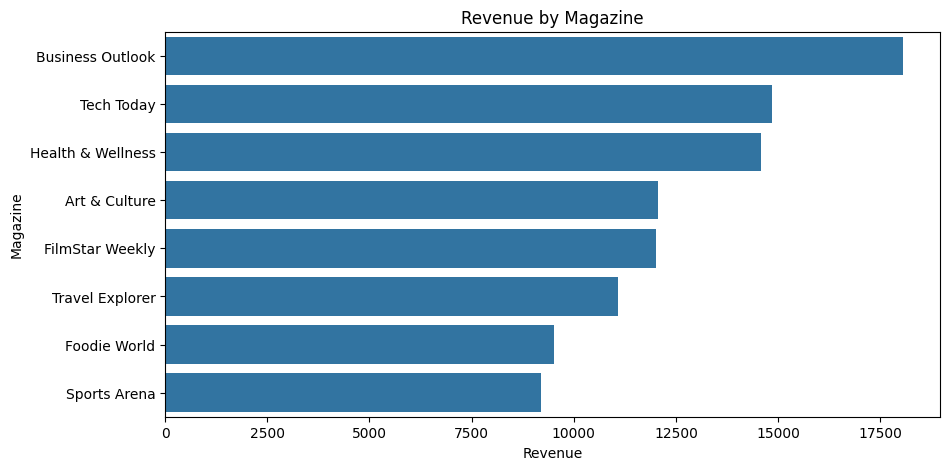

In [ ]:
# Revenue by Magazine (Bar Chart)
plt.figure(figsize=(10,5))
sns.barplot(x="total_revenue", y="magazine_name", data=result2)
plt.title("Revenue by Magazine")
plt.xlabel("Revenue")
plt.ylabel("Magazine")
plt.show()

/tmp/ipython-input-1105447997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="avg_minutes", y="magazine_name", data=result5, palette='viridis')


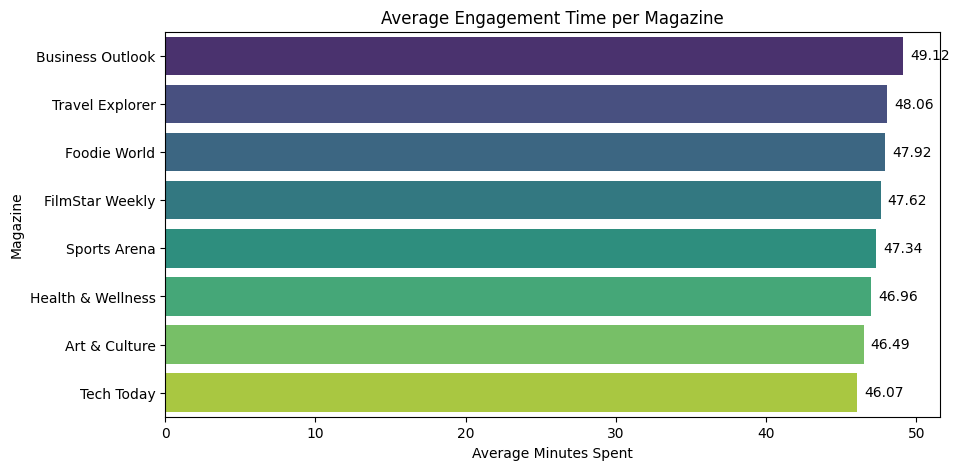

In [ ]:
# Average Engagement Time per Magazine (Bar Chart)
plt.figure(figsize=(10,5))
ax = sns.barplot(x="avg_minutes", y="magazine_name", data=result5, palette='viridis')
plt.title("Average Engagement Time per Magazine")
plt.xlabel("Average Minutes Spent")
plt.ylabel("Magazine")

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

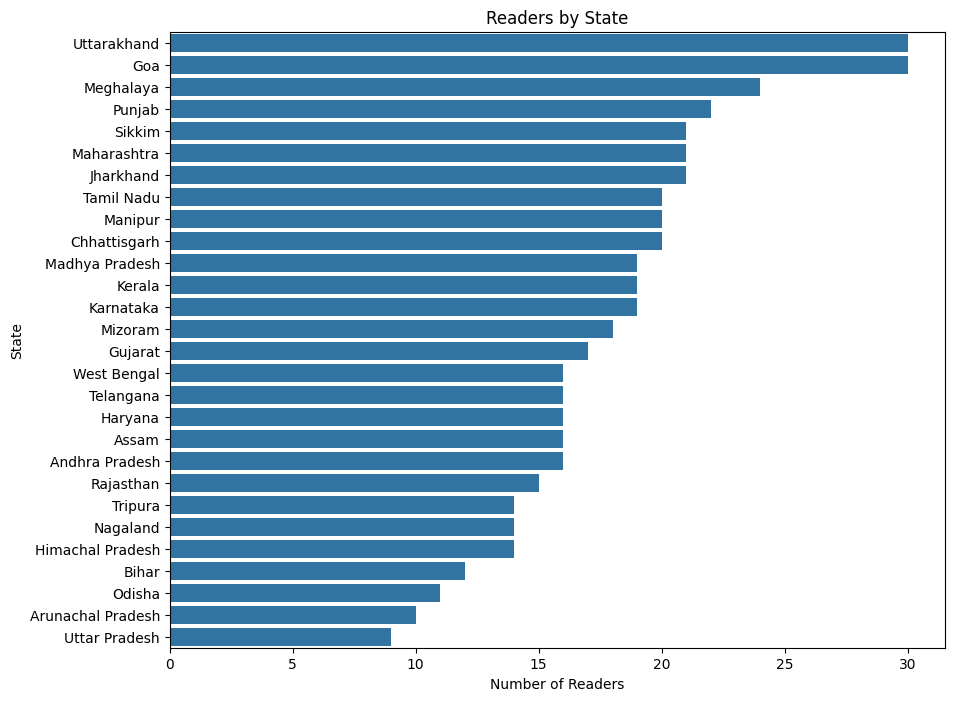

In [ ]:
# Calculate readers by state
query_readers_by_state = """
SELECT state, COUNT(reader_id) AS reader_count
FROM readers_df
GROUP BY state
ORDER BY reader_count DESC;
"""
readers_by_state_df = pysqldf(query_readers_by_state)

# Readers by State (Bar Chart)
plt.figure(figsize=(10, 8))
sns.barplot(x="reader_count", y="state", data=readers_by_state_df)
plt.title("Readers by State")
plt.xlabel("Number of Readers")
plt.ylabel("State")
plt.show()

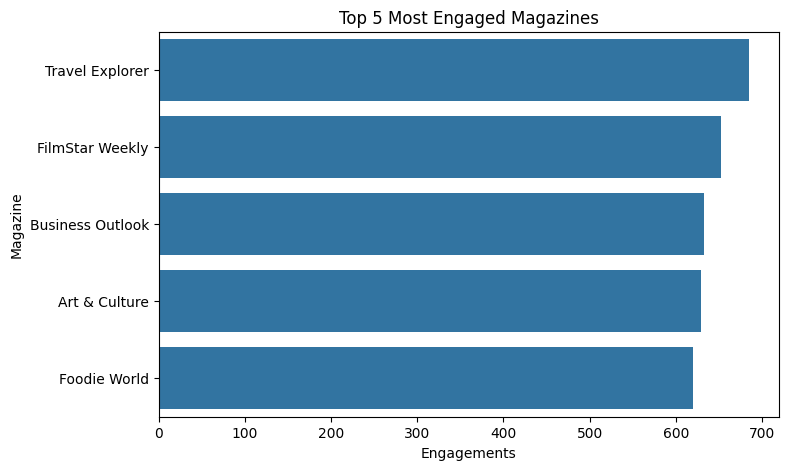

In [ ]:
# Top 5 most engaged magazines
query3 = """
SELECT m.magazine_name, COUNT(e.engagement_id) AS engagement_count
FROM engagement_df e
JOIN magazines_df m ON e.magazine_id = m.magazine_id
GROUP BY m.magazine_name
ORDER BY engagement_count DESC
LIMIT 5;
"""
result3 = pysqldf(query3)

# Engagement (Top 5 Magazines)
plt.figure(figsize=(8,5))
sns.barplot(x="engagement_count", y="magazine_name", data=result3)
plt.title("Top 5 Most Engaged Magazines")
plt.xlabel("Engagements")
plt.ylabel("Magazine")
plt.show()

In [ ]:
print("\n🔎 Subscriptions Overview:")
print(subscriptions_df.describe(include="all"))


🔎 Subscriptions Overview:
        subscription_id    reader_id  magazine_id                  start_date  \
count       2000.000000  2000.000000  2000.000000                        2000   
unique              NaN          NaN          NaN                         NaN   
top                 NaN          NaN          NaN                         NaN   
freq                NaN          NaN          NaN                         NaN   
mean        1000.500000   254.079000   104.553500  2025-02-15 03:51:07.200000   
min            1.000000     1.000000   101.000000         2024-08-18 00:00:00   
25%          500.750000   131.000000   103.000000         2024-11-17 18:00:00   
50%         1000.500000   257.000000   105.000000         2025-02-15 00:00:00   
75%         1500.250000   375.000000   107.000000         2025-05-14 00:00:00   
max         2000.000000   500.000000   108.000000         2025-08-18 00:00:00   
std          577.494589   143.352331     2.265106                         NaN   



In [ ]:
# Missing values check
print("\n❓ Missing Values:")
missing_values = {
    "readers": readers_df.isna().sum().to_dict(),
    "magazines": magazines_df.isna().sum().to_dict(),
    "subscriptions": subscriptions_df.isna().sum().to_dict(),
    "engagement": engagement_df.isna().sum().to_dict()
}
for key, value in missing_values.items():
    print(f"{key}: {value}")


❓ Missing Values:
readers: {'reader_id': 0, 'name': 0, 'age': 0, 'gender': 0, 'city': 0, 'state': 0}
magazines: {'magazine_id': 0, 'magazine_name': 0, 'category': 0, 'price': 0}
subscriptions: {'subscription_id': 0, 'reader_id': 0, 'magazine_id': 0, 'start_date': 0, 'end_date': 0, 'subscription_type': 0}
engagement: {'engagement_id': 0, 'reader_id': 0, 'magazine_id': 0, 'read_date': 0, 'platform': 0, 'minutes_spent': 0}


# *`Univariate`* Analysis

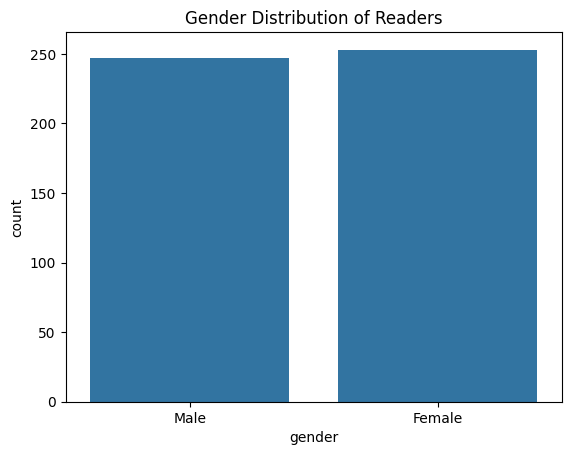

In [ ]:
# Gender distribution
sns.countplot(data=readers_df, x="gender")
plt.title("Gender Distribution of Readers")
plt.show()

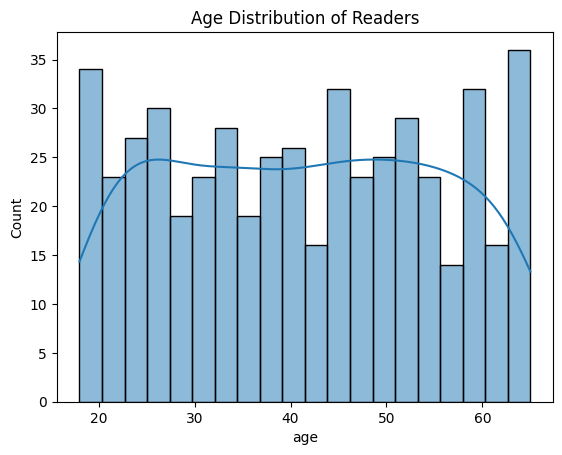

In [ ]:
# Age distribution
sns.histplot(data=readers_df, x="age", bins=20, kde=True)
plt.title("Age Distribution of Readers")
plt.show()

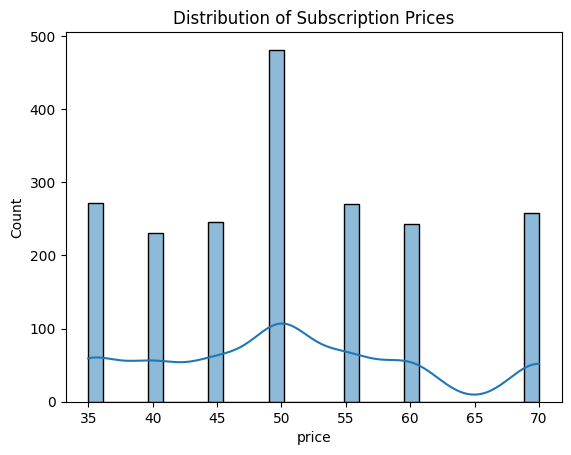

In [ ]:
# Subscription prices
# Join subscriptions_df and magazines_df to get the price for each subscription
subscriptions_with_price = pd.merge(subscriptions_df, magazines_df[['magazine_id', 'price']], on='magazine_id', how='left')

sns.histplot(data=subscriptions_with_price, x="price", bins=30, kde=True)
plt.title("Distribution of Subscription Prices")
plt.show()

# *`Bivariate / Relational Analysis`*

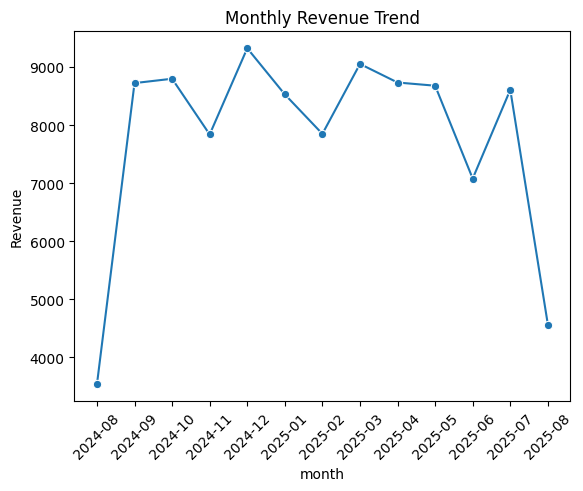

In [ ]:
# Revenue trend over time
subscriptions_df['start_date'] = pd.to_datetime(subscriptions_df['start_date'])
subscriptions_df['month'] = subscriptions_df['start_date'].dt.to_period('M').astype(str)

# Join subscriptions_df and magazines_df to get the price for each subscription
subscriptions_with_price = pd.merge(subscriptions_df, magazines_df[['magazine_id', 'price']], on='magazine_id', how='left')

monthly_revenue = subscriptions_with_price.groupby('month')['price'].sum().reset_index()

sns.lineplot(data=monthly_revenue, x="month", y="price", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()

# *`Deeper Insights`*

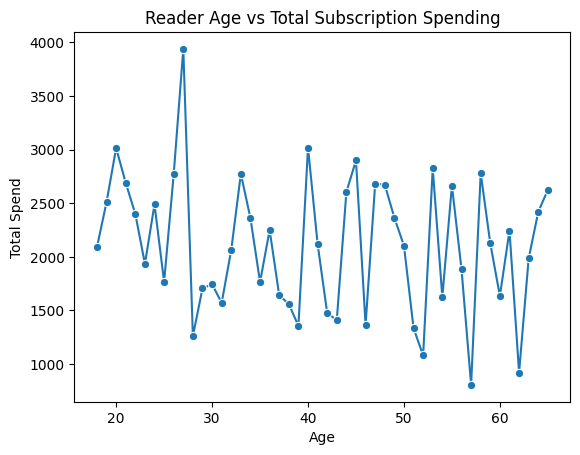

In [ ]:
# Reader age vs subscription spending
reader_age_revenue = subscriptions_df.merge(magazines_df, on="magazine_id").merge(readers_df, on="reader_id")
reader_age_spending = reader_age_revenue.groupby("age")["price"].sum().reset_index()

sns.lineplot(data=reader_age_spending, x="age", y="price", marker="o")
plt.title("Reader Age vs Total Subscription Spending")
plt.xlabel("Age")
plt.ylabel("Total Spend")
plt.show()

# *`Advanced Analysis (Churn / Retention Proxy)`*

/tmp/ipython-input-3731937934.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=status_count, x="status", y="count", palette="coolwarm")


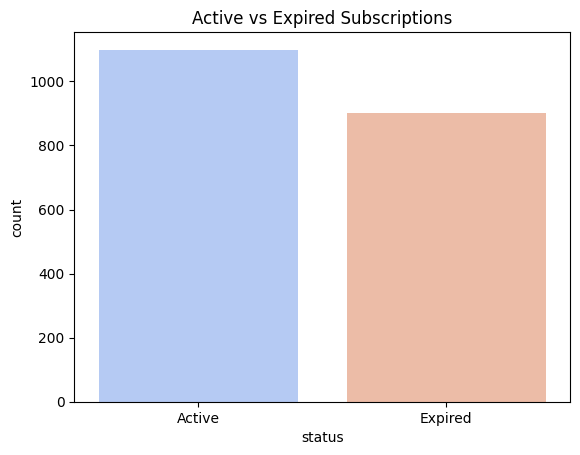

In [ ]:
# Active vs expired subscriptions
import numpy as np
today = pd.to_datetime("today")
subscriptions_df['status'] = np.where(subscriptions_df['end_date'] >= today, "Active", "Expired")

status_count = subscriptions_df['status'].value_counts().reset_index()
status_count.columns = ["status", "count"]

sns.barplot(data=status_count, x="status", y="count", palette="coolwarm")
plt.title("Active vs Expired Subscriptions")
plt.show()


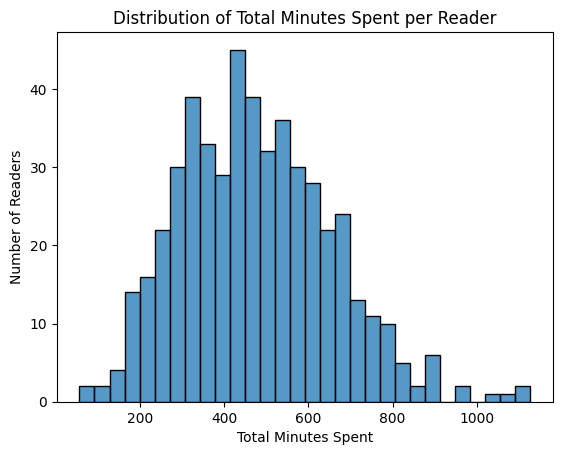

In [ ]:
# Calculate total minutes spent per reader
reader_engagement = engagement_df.groupby("reader_id")["minutes_spent"].sum().reset_index()

# Engagement per reader
sns.histplot(data=reader_engagement, x="minutes_spent", bins=30, kde=False)
plt.title("Distribution of Total Minutes Spent per Reader")
plt.xlabel("Total Minutes Spent")
plt.ylabel("Number of Readers")
plt.show()

# *`Predictive Modeling: Churn Prediction`*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

In [ ]:
# --- Step 1: Prepare Data ---
# Merge readers + subscriptions + magazines for features
df = subscriptions_df.merge(readers_df, on="reader_id", how="left") \
                     .merge(magazines_df, on="magazine_id", how="left")

# Create churn label: 1 = expired, 0 = active
today = pd.to_datetime("today")
df['churn'] = np.where(df['end_date'] < today, 1, 0)

In [ ]:
# Feature engineering
df['subscription_length_days'] = (df['end_date'] - df['start_date']).dt.days
df['start_month'] = df['start_date'].dt.month
df['end_month'] = df['end_date'].dt.month

# Select features
features = ["age", "gender", "state", "category", "price", "subscription_length_days", "start_month"]
target = "churn"

In [ ]:
# Encode categorical variables
df_model = df[features + [target]].copy()
for col in ["gender", "state", "category"]:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])

In [ ]:
# Train/test split
X = df_model[features]
y = df_model[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# --- Step 2: Train Model ---
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.87       220
           1       0.81      0.89      0.85       180

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400


🔎 Confusion Matrix:


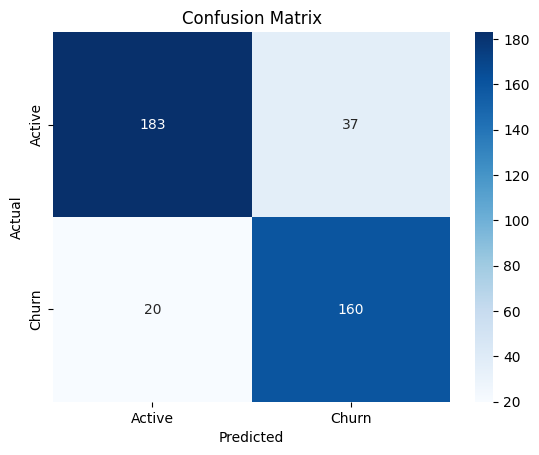

In [ ]:
# --- Step 3: Evaluate Model ---
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🔎 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Active", "Churn"], yticklabels=["Active", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

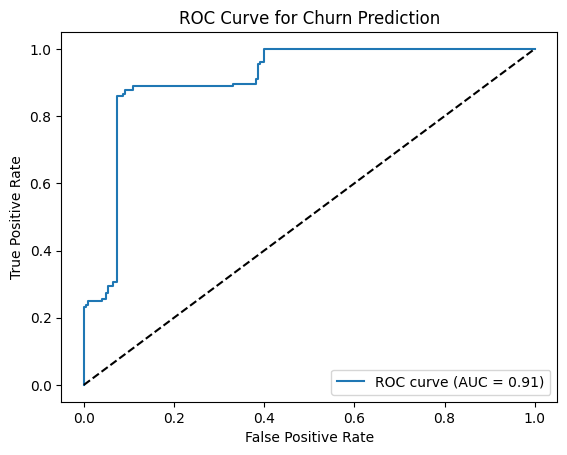

In [ ]:
# ROC Curve
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Churn Prediction")
plt.legend()
plt.show()

/tmp/ipython-input-2892310972.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance, x="importance", y="feature", palette="viridis")


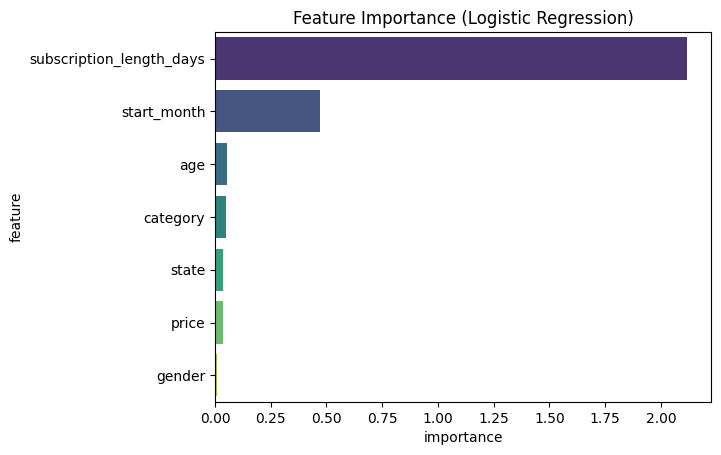

In [ ]:
# --- Step 4: Feature Importance ---
importance = pd.DataFrame({
    "feature": features,
    "importance": np.abs(model.coef_[0])
}).sort_values(by="importance", ascending=False)

sns.barplot(data=importance, x="importance", y="feature", palette="viridis")
plt.title("Feature Importance (Logistic Regression)")
plt.show()

# *`Random Forest for Churn Prediction`*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("\n📊 Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


📊 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       220
           1       0.98      0.93      0.95       180

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



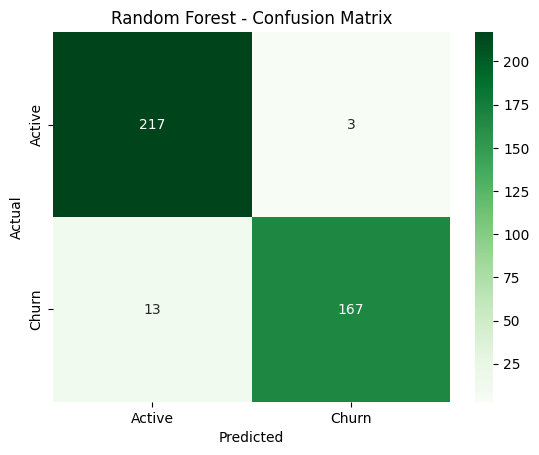

In [ ]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=["Active", "Churn"], yticklabels=["Active", "Churn"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

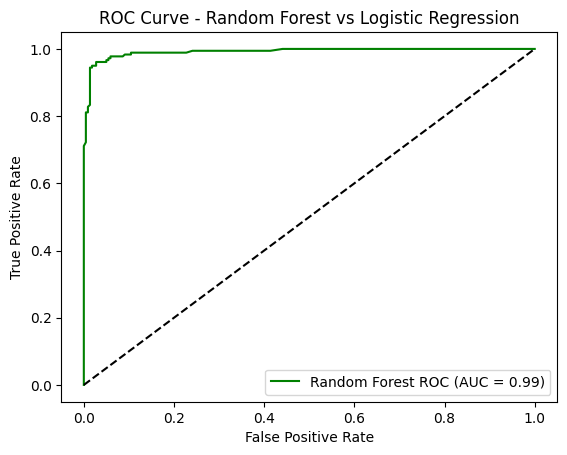

In [ ]:
# ROC Curve
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.plot(fpr_rf, tpr_rf, label=f"Random Forest ROC (AUC = {roc_auc_rf:.2f})", color="green")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest vs Logistic Regression")
plt.legend()
plt.show()

/tmp/ipython-input-2922259260.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_rf, x="importance", y="feature", palette="mako")


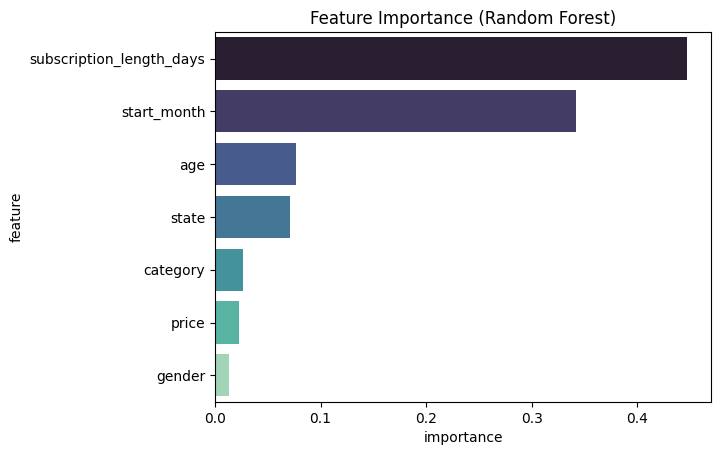

In [ ]:
# Feature Importance
importance_rf = pd.DataFrame({
    "feature": features,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

sns.barplot(data=importance_rf, x="importance", y="feature", palette="mako")
plt.title("Feature Importance (Random Forest)")
plt.show()

# *`Customer Segmentation with KMeans`*

In [ ]:
from sklearn.cluster import KMeans

# Select key features for segmentation
seg_features = ["age", "price", "subscription_length_days"]
df_seg = df[seg_features].copy()

# Scale features
scaler_seg = StandardScaler()
df_seg_scaled = scaler_seg.fit_transform(df_seg)

# Run KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["segment"] = kmeans.fit_predict(df_seg_scaled)

In [ ]:
# Analyze segments
segment_summary = df.groupby("segment").agg({
    "reader_id": "count",
    "age": "mean",
    "price": "mean",
    "subscription_length_days": "mean",
    "churn": "mean"
}).rename(columns={"reader_id": "num_customers", "churn": "churn_rate"})

print("\n📊 Customer Segmentation Summary:")
print(segment_summary)


📊 Customer Segmentation Summary:
         num_customers        age      price  subscription_length_days  \
segment                                                                  
0                  568  40.901408  47.913732                365.000000   
1                  348  41.109195  67.313218                195.660920   
2                  568  28.436620  46.566901                136.109155   
3                  516  53.548450  46.976744                136.918605   

         churn_rate  
segment              
0          0.010563  
1          0.531609  
2          0.640845  
3          0.670543  


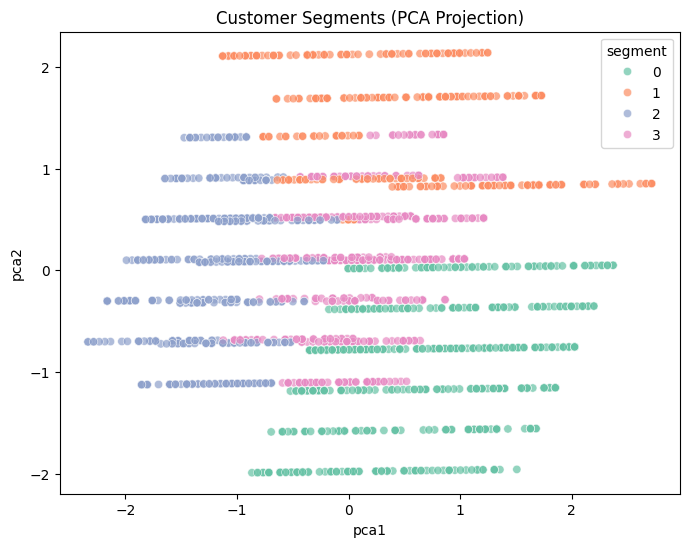

In [ ]:
# Visualize clusters (using 2D PCA for better display)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_seg_scaled)
df["pca1"], df["pca2"] = df_pca[:, 0], df_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="segment", palette="Set2", alpha=0.7)
plt.title("Customer Segments (PCA Projection)")
plt.show()

## What this adds:

✅ Random Forest Classifier

Better prediction power vs Logistic Regression.

Feature importance using decision trees.

ROC Curve comparison.

✅ Customer Segmentation (KMeans)

Segments customers based on age, subscription price, subscription length.

Provides segment-level average age, avg price, avg length, churn rate.

Visualizes segments with PCA scatter plot.

In [ ]:
# Attach Predictions and Segments to the DataFrame
# Make predictions on the entire dataset using Random Forest
y_proba_rf_full = rf_model.predict_proba(X_scaled)[:, 1]
y_pred_rf_full = rf_model.predict(X_scaled)

# Make predictions on the entire dataset using Logistic Regression
y_pred_lr_full = model.predict(X_scaled)
y_proba_lr_full = model.predict_proba(X_scaled)[:,1]

df["churn_probability"] = y_proba_rf_full
df["churn_predicted"] = y_pred_rf_full
df["lr_segment_probability"] = y_proba_lr_full
df["lr_segment_predicted"] = y_pred_lr_full # Assign Logistic Regression predictions

# Display the first few rows with the new columns
display(df[['reader_id', 'churn', 'churn_probability', 'churn_predicted', 'lr_segment_probability', 'lr_segment_predicted']].head())

,reader_id,churn,churn_probability,churn_predicted,lr_segment_probability,lr_segment_predicted
0,150,0,0.045,0,0.513897,1
1,425,1,0.745,1,0.304950,0
2,2,1,0.945,1,0.893530,1
3,161,1,0.995,1,0.550087,1
4,421,1,0.915,1,0.751409,1


In [ ]:
# Save enriched dataset
df.to_csv("customer_prediction_final.csv", index=False)


In [ ]:
from google.colab import files
files.download("customer_prediction_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>